In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ads = pd.read_csv('ads_data.csv')
df_clients = pd.read_csv('ads_clients_data.csv')

In [3]:
df_ads.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [4]:
df_ads.shape

(1000000, 11)

In [5]:
df_ads.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [6]:
df_ads.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [7]:
df_ads.describe()

,ad_id,client_union_id,campaign_union_id,ad_cost,has_video,target_audience_count
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,94521.639602,91435.486997,94368.663159,196.360579,0.005347,8.395493e+06
std,32391.671947,37019.314862,32316.740365,33.248420,0.072927,1.601787e+07
min,2.000000,1.000000,1.000000,33.200000,0.000000,1.090000e+02
25%,107729.000000,107076.000000,107728.000000,190.900000,0.000000,2.239200e+04
50%,112583.000000,111818.000000,112260.000000,208.700000,0.000000,3.275600e+04
75%,112583.000000,111818.000000,112260.000000,210.100000,0.000000,2.512711e+06
max,122078.000000,122078.000000,122078.000000,227.500000,1.000000,1.548271e+08


***
Calculate average number of `views` and average number of `clicks` per advertisement for the entire period 
(It is important to note that some ads did not have clicks):

In [8]:
ad_events = df_ads \
                .groupby(['ad_id', 'event'], as_index=False) \
                .agg({'date': 'count'}) \
                .rename(columns={'date': 'num_events'})
ad_events    

,ad_id,event,num_events
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [9]:
ad_vs_events_pivot = ad_events.pivot(index='ad_id',
                                    columns='event', 
                                    values='num_events') \
                              .reset_index() \
                              .fillna(0)
ad_vs_events_pivot

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [10]:
ad_vs_events_pivot.click.mean()

113.1378238341969

In [11]:
ad_vs_events_pivot.view.mean()

923.1316062176165

***
Draw a distribution for the advertisements with views for the entire period:

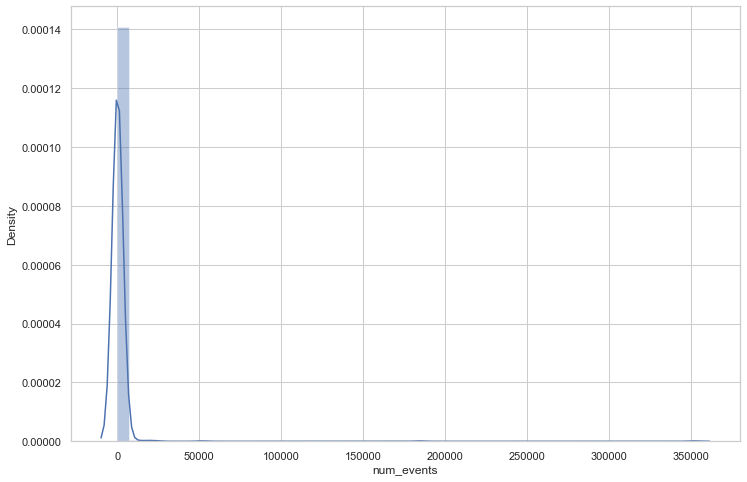

In [12]:
sns.set(font_scale=1,
        style='whitegrid',
        rc={'figure.figsize': (12, 8)})
sns.distplot(ad_events[ad_events['event'] == 'view'].num_events);

For illustrative purposes, take the logarithm from events number and plot the distribution of events(views) on advertisements.

In [13]:
ad_events['log_views'] = np.log(ad_events.num_events)

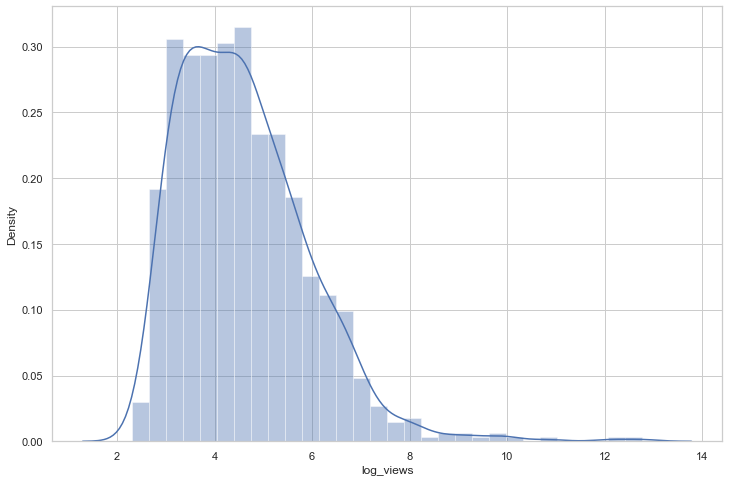

In [14]:
sns.distplot(ad_events[ad_events['event'] == 'view'].log_views);

***
Now let’s calculate the `average` number of ad views per day and then  by this data calculate the `moving average` of views with `window=2`. What is the moving average for April 6, 2019 (round to whole)?

In [15]:
view_vs_date = df_ads \
                    .query('event == "view"') \
                    .pivot_table(index='ad_id', 
                                 columns='date', 
                                 values='time', 
                                 aggfunc='count')

In [16]:
view_vs_date

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [17]:
mean_views = view_vs_date.mean()

In [18]:
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [19]:
rolling_mean_views = mean_views.rolling(2).mean()

In [20]:
rolling_mean_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [21]:
rolling_mean_views \
    .loc['2019-04-06'] \
    .round()

598.0

***
Moving averages are often used to find `anomalies` in data. Let’s try to apply the average and moving average of views by days to one plot. On what day is the largest difference modulo between the arithmetic mean and the rolling mean observed?

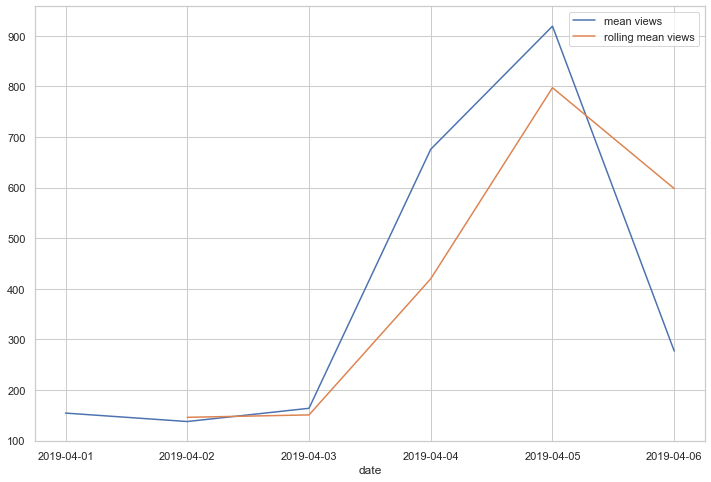

In [22]:
sns.lineplot(data=mean_views, label='mean views')
sns.lineplot(data=rolling_mean_views, label='rolling mean views');

In [23]:
anomaly_day = mean_views \
                .sub(rolling_mean_views) \
                .abs() \
                .idxmax()

In [24]:
anomaly_day

'2019-04-06'

***
Write a `function` that will find a `problem ad` (with the largest/least number of views) on the day on which the largest modulo `anomaly` was observed.

In [25]:
diff = mean_views.sub(rolling_mean_views)[anomaly_day]

In [26]:
diff

-320.9934750733138

In [27]:
if diff <= 0:
    anomaly_ad = view_vs_date[anomaly_day].idxmax()
else:
    anomaly_ad = view_vs_date[anomaly_day].idxmin()

In [28]:
anomaly_ad

112583

In [29]:
def find_anomaly_ad(ads_vs_day_by_views):
    mean_views = ads_vs_day_by_views.mean()
    rolling_views = mean_views.rolling(2).mean()
    delta_mean = mean_views.sub(rolling_views)
    
    anomaly_day = delta_mean \
                    .abs() \
                    .idxmax()
    
    diff = delta_mean[anomaly_day]
    
    if diff <= 0:
        anomaly_ad = ads_vs_day_by_views[anomaly_day].idxmax()
    else:
        anomaly_ad = ads_vs_day_by_views[anomaly_day].idxmin()
        
    return anomaly_ad

In [30]:
find_anomaly_ad(view_vs_date)

112583

***
Let's look at the advertising clients dataset and find the average number of days from the date of creation of the advertising client and the first advertisement launch by this client.

In [31]:
df_clients

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [32]:
df_clients.dtypes

date               object
client_union_id     int64
community_id        int64
create_date        object
dtype: object

In [33]:
df_clients.isna().sum()

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

In [34]:
df_full = df_clients \
            .drop(columns=['date', 'community_id']) \
            .merge(df_ads)

In [35]:
df_full.head()

,client_union_id,create_date,date,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,1,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,1,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,1,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,1,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,1,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [36]:
df_full[['date', 'create_date']] = df_full[['date', 'create_date']].apply(pd.to_datetime)

In [37]:
df_full.dtypes

client_union_id                   int64
create_date              datetime64[ns]
date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [38]:
min_time_diff = df_full \
                .groupby('client_union_id') \
                .apply(lambda group: (group.date - group.create_date).min())

In [39]:
min_time_diff

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [40]:
min_time_diff.mean()

Timedelta('124 days 09:04:43.532219570')

***
Calculate the `conversion` from creating an advertising client to running the first advertisement within a maximum of 365 days.

In [41]:
threshold = pd.to_timedelta(365, unit='d')

In [42]:
threshold

Timedelta('365 days 00:00:00')

In [43]:
min_time_diff < threshold

client_union_id
1         True
9         True
13        True
16        True
20        True
          ... 
122004    True
122013    True
122023    True
122031    True
122078    True
Length: 838, dtype: bool

In [53]:
conversion = min_time_diff[min_time_diff < threshold].count() / df_clients.client_union_id.nunique() * 100

In [54]:
f'{conversion=}%'

'conversion=0.6864463703533806%'

Only `0.68%` of ads clients have converted for the first year after their registration.

***
Let’s break down our customers into groups by periods `[0, 30, 90, 180, 365]` days between creating and running an ad.
Determine how many unique customers have run their first ad in the first month of its existence (from `0` to `30` days)

In [57]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [63]:
clients_categories = pd.cut(min_time_diff, 
                      bins=bins, 
                      labels=['0-30', '30-90', '90-180', '180-365'])

In [64]:
clients_categories

client_union_id
1         90-180
9         90-180
13         30-90
16        90-180
20         30-90
           ...  
122004     30-90
122013    90-180
122023    90-180
122031    90-180
122078     30-90
Length: 838, dtype: category
Categories (4, object): ['0-30' < '30-90' < '90-180' < '180-365']

In [65]:
clients_categories[clients_categories == '0-30'].count()

11

And now let’s show these categories with the number of unique clients in them.

In [70]:
px.bar(clients_categories)